In [1]:
import pandas as pd
import numpy as np
import random
from scipy.spatial import distance

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def most_frequent(samples):
    counter = 0
    num = samples[0]

    for i in samples:
        curr_frequency = samples.count(i)
        if curr_frequency > counter:
            counter = curr_frequency
            num = i
    return num

In [3]:
class Classifier:
    def __init__(self, neigh, t_size):
        self.neigh = neigh
        self.t_size = t_size

    def fit(self, fit_data):
        self.fit_data = fit_data

    def predict(self, testing_data):
        self.testing_data = testing_data
        prediction = []
        counter = 0

        for i in self.testing_data:
            classes = []
            distances = []
            for k in self.fit_data:
                x = np.asarray(i[:-1])
                y = np.asarray(k[:-1])
                dist = distance.euclidean(x, y)
                distances.append([dist, k[-1]])
            counter += 1
            distances.sort(key=lambda p: p[0])
            for l in range(0, self.neigh):
                classes.append(distances[l][1])
            guess = most_frequent(classes)
            prediction.append(guess)
           
        len_predict = len(prediction)
        correct = 0
        wrong = 0
        for n in range(0, len_predict):
            if self.testing_data[n][13] == prediction[n]:
               
                correct += 1
            else:
                wrong += 1

        accuracy = correct / self.t_size
        print("Accuracy: {}%".format(round(accuracy*100, 2)))
        return accuracy 

In [4]:
df = pd.read_csv("input/Credit_card.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

In [5]:
df.columns

Index(['ID', 'Gender', 'Own_car', 'Own_property', 'Work_phone', 'Phone',
       'Email', 'Unemployed', 'Num_children', 'Num_family', 'Account_length',
       'Total_income', 'Age', 'Years_employed', 'Income_type',
       'Education_type', 'Family_status', 'Housing_type', 'Occupation_type',
       'Target'],
      dtype='object')

In [6]:
df.drop(['ID'], axis=1, inplace=True)

In [7]:
df.drop(['Income_type','Education_type','Family_status','Housing_type','Occupation_type'], axis=1, inplace=True)

In [8]:
df.columns
df.shape

(9709, 14)

In [9]:
df.drop(df.index[1000:], inplace=True)
full_data = df.astype(float).values.tolist()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          1000 non-null   int64  
 1   Own_car         1000 non-null   int64  
 2   Own_property    1000 non-null   int64  
 3   Work_phone      1000 non-null   int64  
 4   Phone           1000 non-null   int64  
 5   Email           1000 non-null   int64  
 6   Unemployed      1000 non-null   int64  
 7   Num_children    1000 non-null   int64  
 8   Num_family      1000 non-null   int64  
 9   Account_length  1000 non-null   int64  
 10  Total_income    1000 non-null   float64
 11  Age             1000 non-null   float64
 12  Years_employed  1000 non-null   float64
 13  Target          1000 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 109.5 KB


In [11]:
random.seed(42)
random.shuffle(full_data)

In [13]:
test_size = 0.3
test_data_size = test_size * len(full_data)
train_data = full_data[:-int(test_size * len(full_data))]
test_data = full_data[-int(test_size * len(full_data)):]
print(test_data_size)

300.0


In [14]:
k_values = [i for i in range (1,20)]
accuracies = []
for k in k_values:
    knn = Classifier(k, test_data_size)
    knn.fit(train_data)
    accuracy = knn.predict(test_data)
    accuracies.append(np.mean( accuracy))

Accuracy: 78.0%
Accuracy: 78.0%
Accuracy: 87.0%
Accuracy: 87.0%
Accuracy: 87.33%
Accuracy: 88.0%
Accuracy: 88.67%
Accuracy: 88.67%
Accuracy: 89.0%
Accuracy: 89.0%
Accuracy: 89.0%
Accuracy: 89.0%
Accuracy: 89.0%
Accuracy: 89.0%
Accuracy: 89.0%
Accuracy: 89.0%
Accuracy: 89.0%
Accuracy: 89.0%
Accuracy: 89.0%


Text(0, 0.5, 'Accuracy Score')

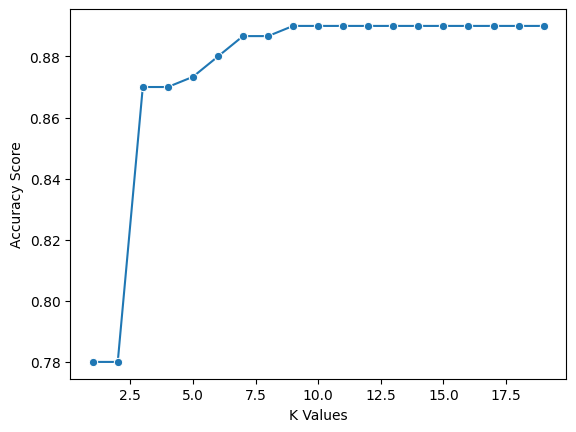

In [16]:
sns.lineplot(x = k_values, y = accuracies, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [15]:
k_neigh = 9
knn = Classifier(k_neigh, test_data_size)
knn.fit(train_data)
knn.predict(test_data)

Accuracy: 89.0%


0.89